In [33]:
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from typing import Optional

In [44]:
with open("output.json", "r") as f:
    data = json.load(f)

In [45]:
data

{'max_pos': 132,
 'min_pos': -1.000000000000007,
 'max_time': 56.00000000000001,
 'min_time': -1,
 'user_interfaces': [{'point1': {'time': 10, 'position': 40},
   'point2': {'time': 20, 'position': 40}},
  {'point1': {'time': 25, 'position': 30},
   'point2': {'time': 40, 'position': 30}}],
 'interfaces': [{'above': {'density': 0.5, 'flow': 1},
   'below': {'density': 4, 'flow': 1},
   'point1': {'time': 10, 'position': 40},
   'point2': {'time': 20, 'position': 40}},
  {'above': {'density': 0, 'flow': 0},
   'below': {'density': 5, 'flow': 0},
   'point1': {'time': 25, 'position': 30},
   'point2': {'time': 40, 'position': 30}},
  {'above': {'density': 4, 'flow': 1},
   'below': {'density': 1, 'flow': 2},
   'point1': {'time': 10, 'position': 40},
   'point2': {'time': 55.00000000000001, 'position': -7.105427357601002e-15}},
  {'above': {'density': 1, 'flow': 2},
   'below': {'density': 0.5, 'flow': 1},
   'point1': {'time': 10, 'position': 40},
   'point2': {'time': 56.00000000000001

In [47]:
def create_figure_plt(
    with_trajectories=False,
    num_trajectories: int = 100,
    with_polygons=False,
) -> tuple:
    """This function generates a matplotlib figure showing the fundamental digram,
    using the currently generated interfaces stored in self.interfaces.

    Trajectories can also be plotted, if specified.

    Args:
        with_trajectories (bool, optional): Whether or not to plot trajectories.
        Defaults to False.

    Returns:
        tuple[Figure, Axes]: the figure and axes of the generated image
    """

    fig, ax = plt.subplots(figsize=(20, 10))

    figure = data

    # for graph_polygon in figure.polygons:
    #     ax.add_patch(
    #         patches.Polygon(
    #             graph_polygon.polygon.exterior.coords,
    #             closed=True,
    #             alpha=0.5,
    #         )
    #     )
    #     ax.annotate(
    #         graph_polygon.label,
    #         graph_polygon,
    #         horizontalalignment="center",
    #         verticalalignment="center",
    #     )

    for user_interface in figure["user_interfaces"]:
        ax.plot(
            (user_interface["point1"]["time"], user_interface["point2"]["time"]),
            (
                user_interface["point1"]["position"],
                user_interface["point2"]["position"],
            ),
            alpha=0.9,
            linestyle="dashed",
        )

    for interface in figure["interfaces"]:
        ax.plot(
            (interface["point1"]["time"], interface["point2"]["time"]),
            (interface["point1"]["position"], interface["point2"]["position"]),
            marker="o",
        )

    for trajectory in figure["trajectories"]:
        for i in range(len(trajectory) - 1):
            point1 = trajectory[i]
            point2 = trajectory[i + 1]

            ax.plot(
                (point1["time"], point2["time"]),
                (point1["position"], point2["position"]),
                linewidth=0.5,
                alpha=0.8,
            )

    ax.set_xbound(figure["min_time"], figure["max_time"])
    ax.set_ybound(figure["min_pos"], figure["max_pos"])

    ax.set_title("Shockwave Diagram")
    ax.set_xlabel("Time (seconds)")
    ax.set_ylabel("Position (meters)")

    plt.close(fig)

    return (fig, ax)

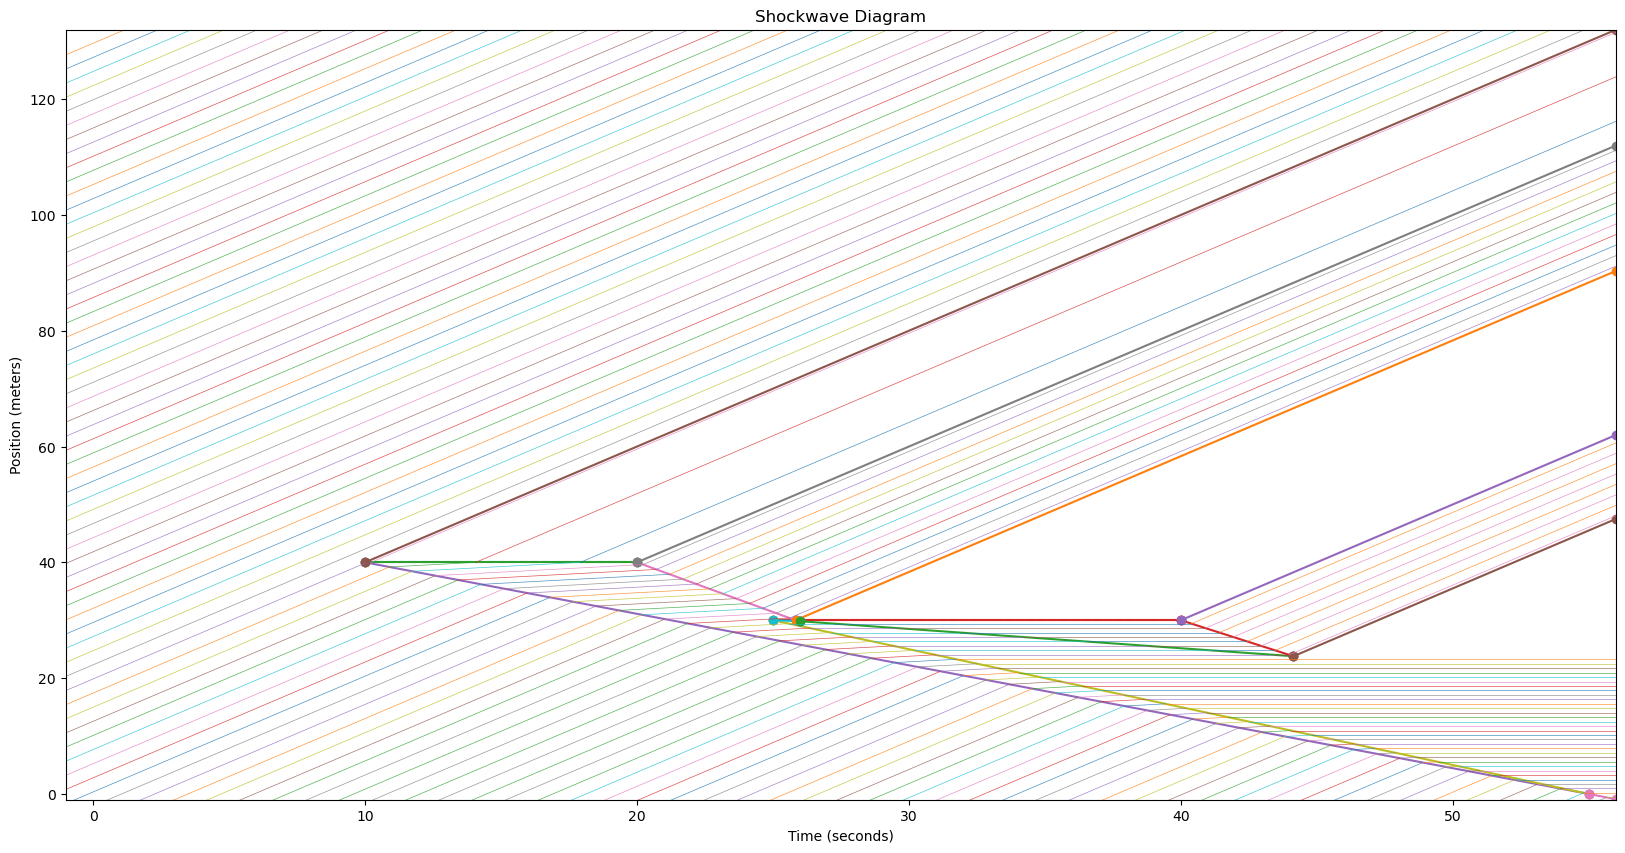

In [48]:
fig, ax = create_figure_plt(True)
fig